Steady-state density matrix (diagonal elements): [0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025]
Site indices (n_N): [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]


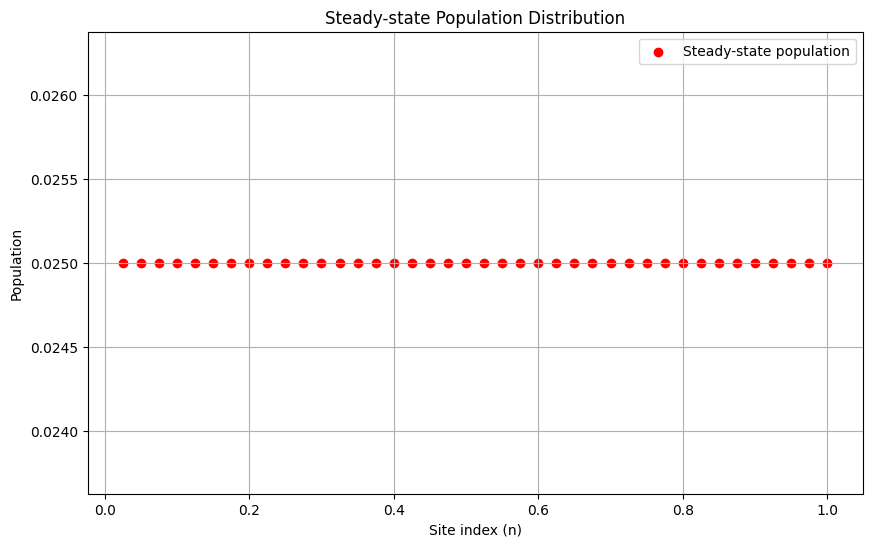

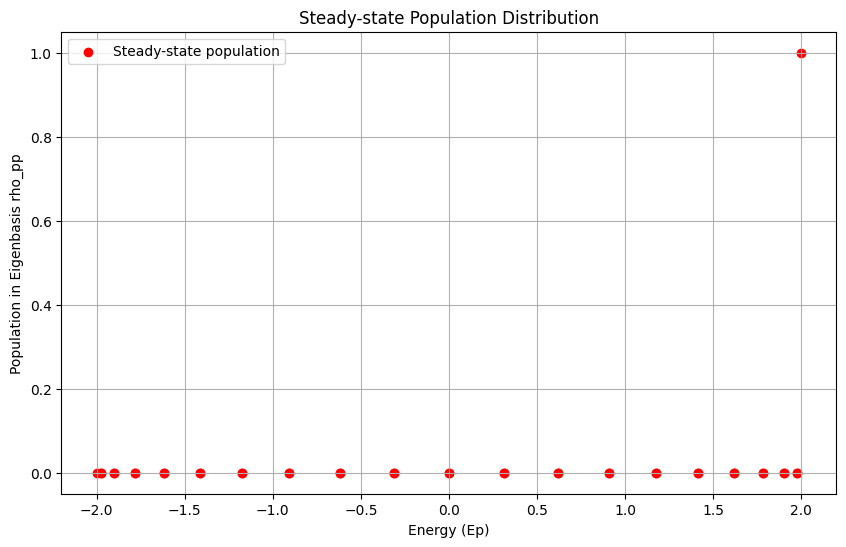

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *


n = 40
gamma = 1.0 
t_list = np.linspace(0, 10, 10)  # Time 

rho0 = Qobj(np.identity(n) / n)


def tight_binding_hamiltonian(n, t):
    H = np.zeros((n, n))
    for k in range(n - 1):
        H[k, k + 1] = t  
        H[k + 1, k] = t
    H[0, n-1] = t
    H[n-1, 0] = t
    return Qobj(H)

def get_jump_operators(n, alpha_val= np.pi):

    c_ops = []
   
    for i in range(n - 1):
      
        coeff_ii = 1.0
        coeff_ij = -np.exp(-1j * alpha_val)
        coeff_ji = np.exp(1j * alpha_val)  
        coeff_jj = -1.0
        
        S_mat = np.zeros((n, n), dtype=np.complex128)
        S_mat[i, i] = coeff_ii
        S_mat[i, i+1] = coeff_ij
        S_mat[i+1, i] = coeff_ji
        S_mat[i+1, i+1] = coeff_jj
        
        c_ops.append(Qobj(S_mat) * np.sqrt(gamma))
        
    return c_ops

H= tight_binding_hamiltonian(n, t=1.0)
c_ops = get_jump_operators(n, alpha_val= 0)
L_op = liouvillian(H, c_ops)
rho_ss = steadystate(L_op)

rho_nn = rho_ss.diag().real
n_N = [i/n for i in range(1, n+1)]

print("Steady-state density matrix (diagonal elements):", np.round(rho_nn, 3))
print("Site indices (n_N):", n_N)




plt.figure(figsize=(10, 6))

plt.scatter(n_N, np.round( rho_nn,3), label=f'Steady-state population', color = 'red', marker='o')
plt.xlabel('Site index (n)')
plt.ylabel('Population')
plt.title('Steady-state Population Distribution')
plt.legend()
plt.grid()
plt.show()









E, states = H.eigenstates()
U = np.column_stack([s.full().flatten() for s in states])
rho_eig = U.conj().T @ rho_ss.full() @ U
rho_pp = np.real(np.diag(rho_eig))

plt.figure(figsize=(10, 6))

plt.scatter(E, np.round( rho_pp,4), label=f'Steady-state population', color = 'red', marker='o')
plt.xlabel('Energy (Ep)')
plt.ylabel('Population in Eigenbasis rho_pp')
plt.title('Steady-state Population Distribution')
plt.legend()
plt.grid()
plt.show()



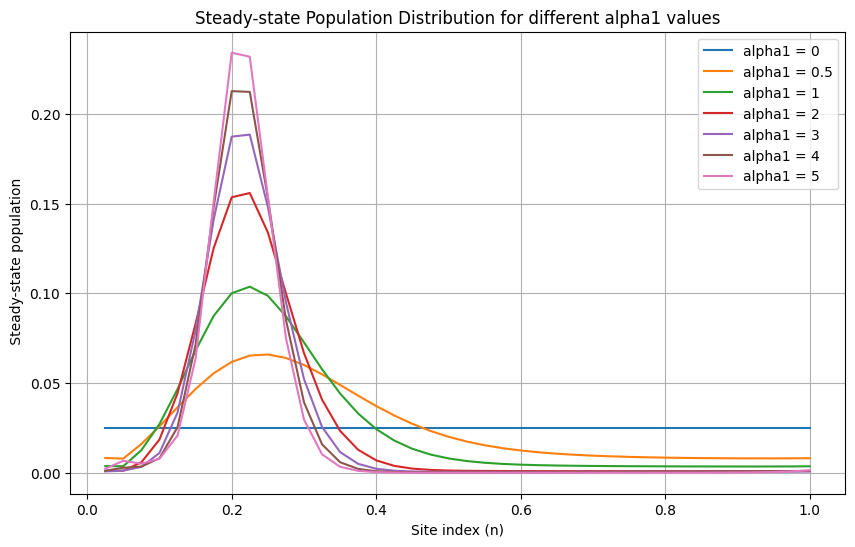

In [24]:
def get_jump_operator(n, alpha1, beta, v):
    c_ops = []

    for i in range(n - 1):
        alpha_n = alpha1 * np.cos(2*np.pi*beta*(i**v))
        S = np.zeros((n,n), dtype=complex)
        S[i,i] = 1
        S[i,i+1] = -np.exp(-1j*alpha_n)
        S[i+1,i] = np.exp(1j*alpha_n)
        S[i+1,i+1] = -1
        c_ops.append(Qobj(S)*np.sqrt(gamma))

    # periodic bond
    alpha_n = alpha1 * np.cos(2*np.pi*beta*((n-1)**v))
    S = np.zeros((n,n), dtype=complex)
    S[n-1,n-1] = 1
    S[n-1,0] = -np.exp(-1j*alpha_n)
    S[0,n-1] = np.exp(1j*alpha_n)
    S[0,0] = -1
    c_ops.append(Qobj(S)*np.sqrt(gamma))

    return c_ops









n= 40
Rho_nn =[]

# alpha1 = np.linspace(0,5,15)
alpha1 = [0,0.5,1 ,2 ,3,4,5]

beta = (np.sqrt(5) - 1)/2
v= 0.1
for i in alpha1:
    c_ops = get_jump_operator(n, i, beta , v)
    H= tight_binding_hamiltonian(n, t=1.0)
    L_op = liouvillian(H, c_ops)
    rho_ss = steadystate(L_op)
    rho_nn = rho_ss.diag().real
    # Rho_nn.append(np.log(rho_nn)) # taking logarithm of rho_nn as base e
    Rho_nn.append(rho_nn)

#plot a gradient with y axis being alpha1 and x axis being n_N and color being rho_nn
# plt.figure(figsize=(10, 6))
# plt.imshow(Rho_nn, extent=[0, 1, 0, 5], aspect='auto', origin='lower', cmap='viridis')
# plt.colorbar(label='Steady-state population')
# plt.xlabel('Site index (n)')
# plt.ylabel('Alpha1')
#plot y ais with rho_nn as a function of n_N in x axis with different alpha1 values as different lines in the same graph
n_N = [i/n for i in range(1, n+1)]
# Rho_nn = [np.exp(rho) for rho in Rho_nn]
plt.figure(figsize=(10, 6))
for i in range(len(alpha1)):
    plt.plot(n_N, Rho_nn[i], label=f'alpha1 = {alpha1[i]}')
plt.xlabel('Site index (n)')
plt.ylabel(' Steady-state population')
plt.title('Steady-state Population Distribution for different alpha1 values')
plt.legend()
plt.grid()
plt.show()                  


In [29]:
def von_neumann_entropy(rho):
    evals = np.real(np.linalg.eigvalsh(rho.full()))
    evals = evals[evals > 1e-15]
    return -np.sum(evals * np.log(evals))



def compute_observables(rho_ss, H):
    # ----- Purity -----
    purity = (rho_ss * rho_ss).tr().real

    # ----- Participation Ratio (site basis) -----
    rho_nn = rho_ss.diag().real
    PR = 1.0 / np.sum(rho_nn**2)

    # ----- Relative entropy of coherence (eigenbasis) -----
    E, states = H.eigenstates()
    U = np.column_stack([s.full().flatten() for s in states])

    rho_eig = U.conj().T @ rho_ss.full() @ U
    rho_diag = np.diag(np.diag(rho_eig))

    S_rho = von_neumann_entropy(Qobj(rho_eig))
    S_diag = von_neumann_entropy(Qobj(rho_diag))

    Cre = S_diag - S_rho

    return Cre, purity, PR

n = 40
gamma = 1.0
alpha1 = 4.0
beta = (np.sqrt(5) - 1) / 2

nu_list = np.linspace(0.1, 0.9, 9)

Cre_list = []
purity_list = []
PR_list = []

for v in nu_list:
    c_ops = get_jump_operator(n, alpha1, beta, v)
    H = tight_binding_hamiltonian(n, t=1.0)
    rho_ss = steadystate(liouvillian(H, c_ops))

    Cre, purity, PR = compute_observables(rho_ss, H)

    Cre_list.append(Cre)
    purity_list.append(purity)
    PR_list.append(PR)



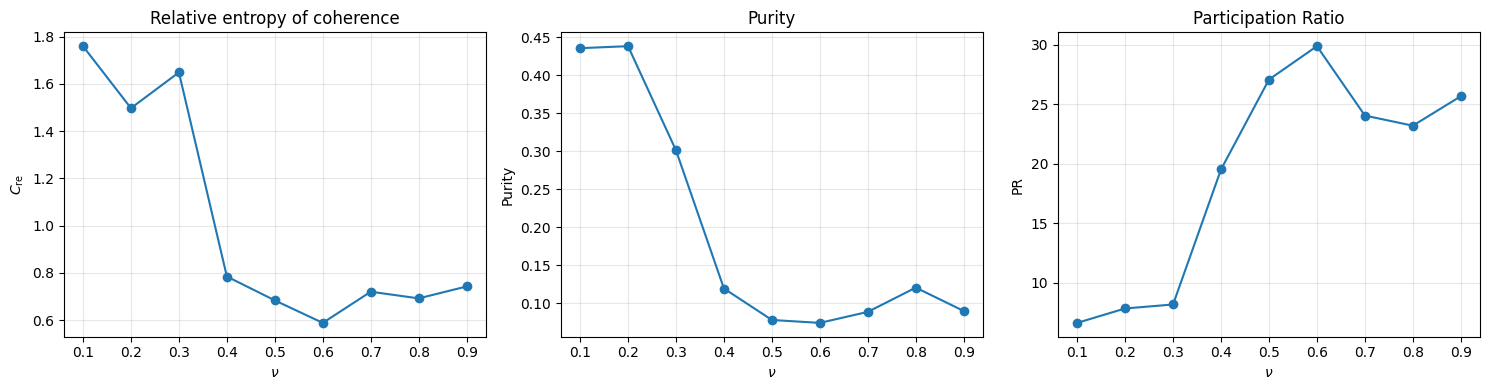

In [30]:
plt.figure(figsize=(15,4))

# (a) Relative entropy of coherence
plt.subplot(1,3,1)
plt.plot(nu_list, Cre_list, 'o-')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$C_{\mathrm{re}}$')
plt.title('Relative entropy of coherence')
plt.grid(alpha=0.3)

# (b) Purity
plt.subplot(1,3,2)
plt.plot(nu_list, purity_list, 'o-')
plt.xlabel(r'$\nu$')
plt.ylabel('Purity')
plt.title('Purity')
plt.grid(alpha=0.3)

# (c) Participation ratio
plt.subplot(1,3,3)
plt.plot(nu_list, PR_list, 'o-')
plt.xlabel(r'$\nu$')
plt.ylabel('PR')
plt.title('Participation Ratio')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


/tmp/ipykernel_305610/1513578108.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


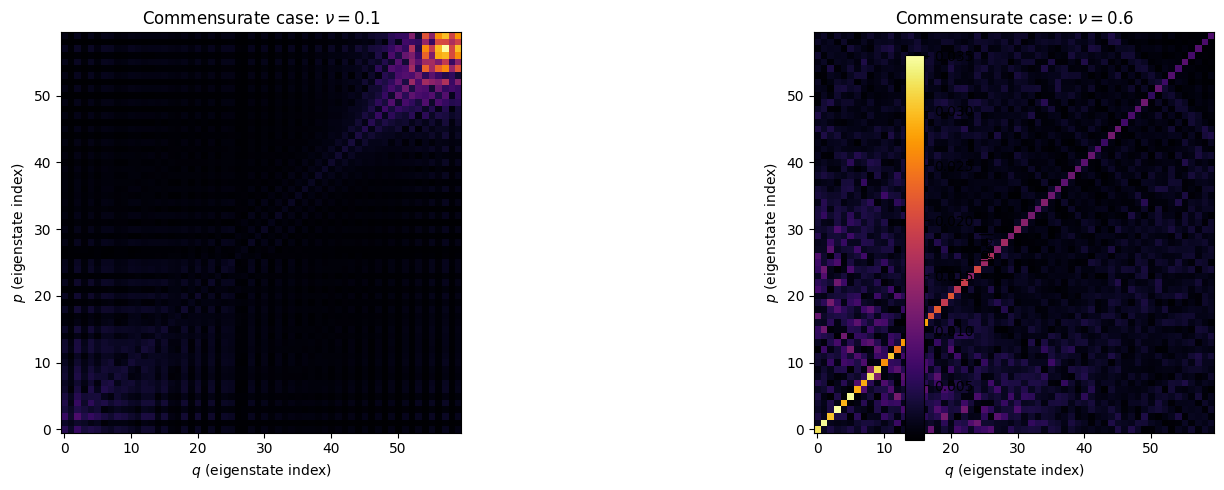

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
n = 60             # system size (use 144 later)
t = 1.0
gamma = 1.0

alpha1 = 4.0
beta = 0.5          # commensurate case
nu_list = [0.1, 0.6]

def tight_binding_hamiltonian(n, t):
    H = np.zeros((n, n), dtype=complex)
    for i in range(n - 1):
        H[i, i+1] = t
        H[i+1, i] = t
    # periodic bond
    H[0, n-1] = t
    H[n-1, 0] = t
    return Qobj(H)


def get_jump_operator(n, alpha1, beta, v):
    c_ops = []

    for i in range(n - 1):
        alpha_n = alpha1 * np.cos(2*np.pi*beta*(i**v))
        S = np.zeros((n, n), dtype=complex)
        S[i, i] = 1
        S[i, i+1] = -np.exp(-1j*alpha_n)
        S[i+1, i] = np.exp(1j*alpha_n)
        S[i+1, i+1] = -1
        c_ops.append(Qobj(S) * np.sqrt(gamma))

    # periodic dissipator (n-1, 0)
    alpha_n = alpha1 * np.cos(2*np.pi*beta*((n-1)**v))
    S = np.zeros((n, n), dtype=complex)
    S[n-1, n-1] = 1
    S[n-1, 0] = -np.exp(-1j*alpha_n)
    S[0, n-1] = np.exp(1j*alpha_n)
    S[0, 0] = -1
    c_ops.append(Qobj(S) * np.sqrt(gamma))

    return c_ops

def rho_in_eigenbasis(rho_ss, H):
    E, states = H.eigenstates()
    U = np.column_stack([s.full().flatten() for s in states])
    return U.conj().T @ rho_ss.full() @ U

H = tight_binding_hamiltonian(n, t)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, v in zip(axes, nu_list):
    c_ops = get_jump_operator(n, alpha1, beta, v)
    L = liouvillian(H, c_ops)
    rho_ss = steadystate(L)

    rho_pq = rho_in_eigenbasis(rho_ss, H)

    im = ax.imshow(
        np.abs(rho_pq),
        origin='lower',
        cmap='inferno',
        aspect='equal'
    )

    ax.set_title(rf'Commensurate case: $\nu={v}$')
    ax.set_xlabel(r'$q$ (eigenstate index)')
    ax.set_ylabel(r'$p$ (eigenstate index)')

fig.colorbar(im, ax=axes.ravel().tolist(), label=r'$|\rho_{pq}|$')
plt.tight_layout()
plt.show()
